# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [1]:
# run this
!pip list

Package                       Version
----------------------------- -------------------
absl-py                       1.0.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aiosignal                     1.3.1
aiosqlite                     0.19.0
alabaster                     0.7.13
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.12.11
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
async-lru                     2.0.2
async-timeout                 4.0.2
attrs                         23.2.0
autodoc                       0.5.0
autopep8                      2.0.4
Babel                         2.11.0
backcall                      0.2.0
bbc-feeds                     2.1
beautifulsoup4                4.12.2
black                         22.1.0
bleach                        6.0.0
blin

# Part A – Exploratory data analysis and data visualisation 

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [2]:
import pandas as pd

In [3]:
data1 = pd.read_csv("dataset1.csv")
data1.head()

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

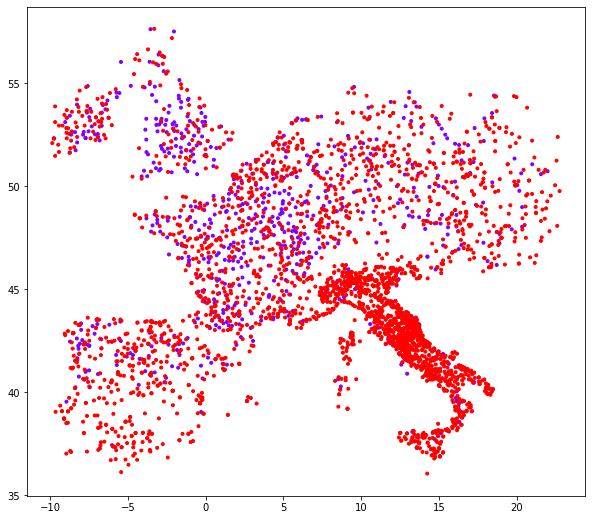

In [5]:
f, ax = plt.subplots(figsize=(10, 9))
ax.scatter(data1.Longitude, data1.Latitude, marker=".", c=data1.Monastery_index, cmap="rainbow")

3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

In [6]:
import numpy as np

(array([  0.,   0.,   0.,  11.,  50., 262., 117.,  80., 280., 491., 302.,
        235., 110., 255.,  61.,  61., 167., 274., 432., 268., 221.,   0.,
          0.,   0.,   1.,   0.,   0.]),
 array([1000, 1025, 1050, 1075, 1100, 1125, 1150, 1175, 1200, 1225, 1250,
        1275, 1300, 1325, 1350, 1375, 1400, 1425, 1450, 1475, 1500, 1525,
        1550, 1575, 1600, 1625, 1650, 1675]),
 <BarContainer object of 27 artists>)

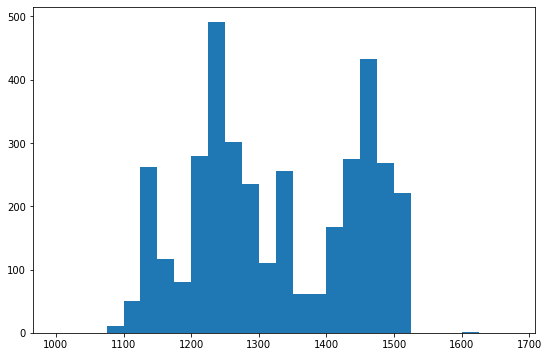

In [7]:
f2, ax2 = plt.subplots(figsize=(9, 6))
bins = np.arange(1000, 1700, 25)

ax2.hist(data1.Starting, bins=bins)

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure. 

[2 marks]

Text(0.5, 0.98, 'Starting Year')

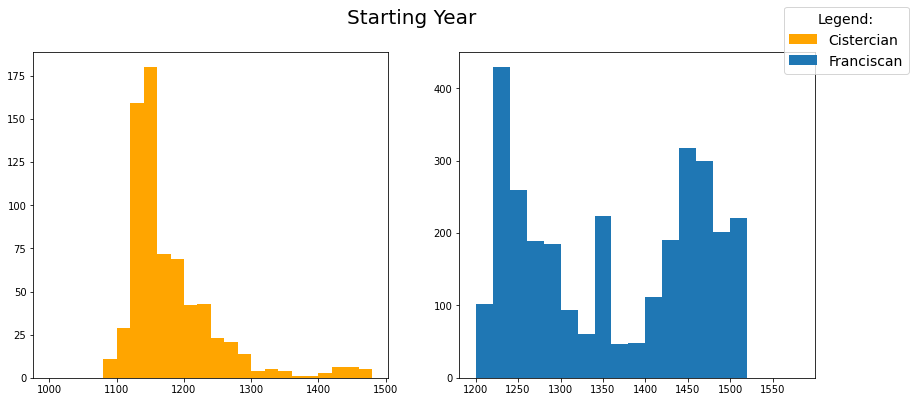

In [8]:
f3, ax3 = plt.subplots(1, 2, figsize=(14, 6))
bins0 = np.arange(1000, 1500, 20)
ax3[0].hist(data1.loc[data1["Monastery"]=="Cistercians", "Starting"], bins=bins0, label="Cistercian", color="orange")
bins1 = np.arange(1200, 1600, 20)
ax3[1].hist(data1.loc[data1["Monastery"]=="Franciscans", "Starting"], bins=bins1, label="Franciscan")
f3.legend(title="Legend:", title_fontsize=14, fontsize=14)
f3.suptitle("Starting Year", fontsize=20)

5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

(array([  0.,   3.,   8.,  18.,  33., 191.,  18., 262., 118.,  30.]),
 array([1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]),
 <BarContainer object of 10 artists>)

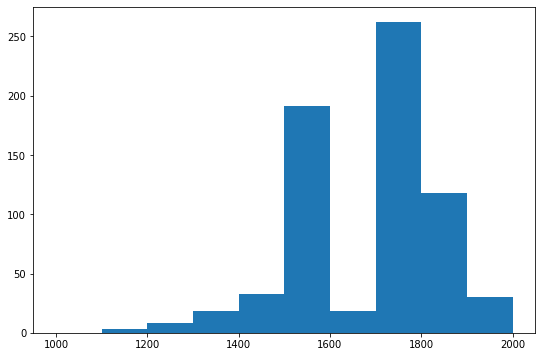

In [9]:
f4, ax4 = plt.subplots(figsize=(9, 6))
bins = np.arange(1000, 2100, 100)

ax4.hist(data1.Ending, bins=bins)

Text(0.5, 0.98, 'Ending Year')

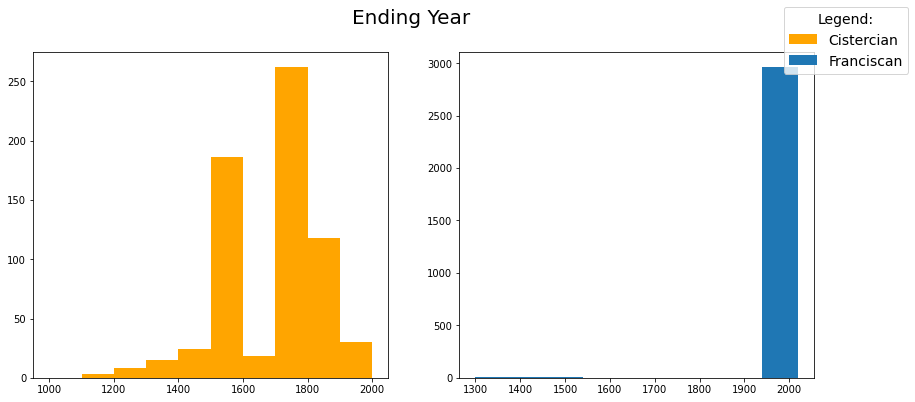

In [10]:
f5, ax5 = plt.subplots(1, 2, figsize=(14, 6))
bins0 = np.arange(1000, 2100, 100)
ax5[0].hist(data1.loc[data1["Monastery"]=="Cistercians", "Ending"], bins=bins0, label="Cistercian", color="orange")
bins1 = np.arange(1300, 2100, 80)
ax5[1].hist(data1.loc[data1["Monastery"]=="Franciscans", "Ending"], bins=bins1, label="Franciscan")
f5.legend(title="Legend:", title_fontsize=14, fontsize=14)
f5.suptitle("Ending Year", fontsize=20)

6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

<BarContainer object of 16 artists>

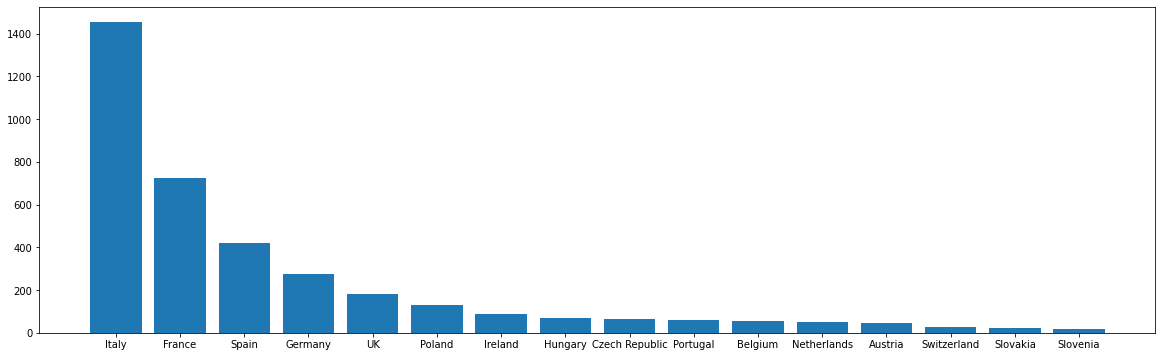

In [11]:
counts = {}
for i, row in data1.iterrows():
    con = row["Country"]
    try:
        counts[con] += 1
    except:
        counts[con] = 1
counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))

f6, ax6 = plt.subplots(figsize=(20, 6))
ax6.bar(counts.keys(), counts.values())

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [12]:
x = data1[["Starting", "Ending"]]
y = data1["Monastery_index"]

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)

9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

In [14]:
from sklearn.linear_model import Perceptron
P = Perceptron(max_iter=50, eta0=0.1)
P.fit(x_train, y_train)
y_pred = P.predict(x_test)

In [15]:
wrong = 0
y_test = y_test.reset_index(drop=True)

for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        wrong += 1
mislabeled = wrong/len(y_pred)

print(f"{mislabeled:.4f} mislabeled (4dp)")

0.1903 mislabeled


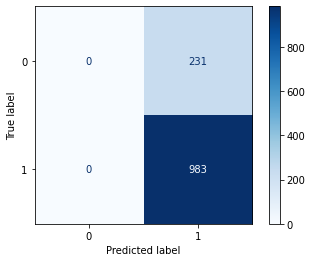

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print(f"precision score of the model is {precision_score(y_test, y_pred):4f}")
print(f"recall score of the model is {recall_score(y_test, y_pred):4f}")
print(f"accuracy score of the model is {accuracy_score(y_test, y_pred):4f}")
print(f"f1 score of the model is {f1_score(y_test, y_pred):4f}")

precision score of the model is 0.809720
recall score of the model is 1.000000
accuracy score of the model is 0.809720
f1 score of the model is 0.894857


10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(fit_intercept=True)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [19]:
wrong = 0
y_test = y_test.reset_index(drop=True)

for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        wrong += 1
mislabeled = wrong/len(y_pred)

print(f"{mislabeled:.4f} mislabeled")

0.0255 mislabeled


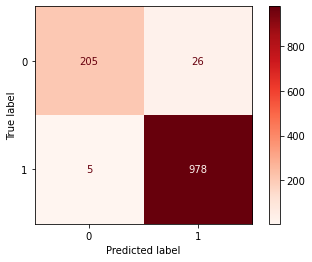

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Reds")

In [21]:
print(f"precision score of the model is {precision_score(y_test, y_pred):.4f}")
print(f"recall score of the model is {recall_score(y_test, y_pred):.4f}")
print(f"accuracy score of the model is {accuracy_score(y_test, y_pred):.4f}")
print(f"f1 score of the model is {f1_score(y_test, y_pred):.4f}")

precision score of the model is 0.9741
recall score of the model is 0.9949
accuracy score of the model is 0.9745
f1 score of the model is 0.9844


For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]

In [22]:
# Train-test-split is important in order to have training data which the model can "learn" from and separate testing data which the
# model can then be judged on since it has never seen this data before. This is necessary to improve models with repeated stages
# of training and testing and/or to compare the performance of different models/ same model with different parameters etc.

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks] 

In [23]:
# Logistic Regression performed better, from general overview of confusion matrix you can see Logistic Regression model provided
# much higher proportion of correct predictions compared with the Perceptron Model more specifically, it had much higher
# precision and accuracy scores which means Logistic Regression had more correct positive predictions of all those classified
# as positive as well as more correct predictions (positive and negative) of all predictions made over the test data due to these
# major changes, f1 score of Logistic Regression is almost 10% higher than the Perceptron, generally indicating better performance

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

In [24]:
# they change slightly however comparatively this does not make a significant difference
# this is due to change in train-test-split data as while i have ensured the proportions of the two classes remain the same
# using stratify=y the actual data points still change and therefore the model has slightly different performance having
# and trained and then been tested differently than the first time, leading to different distribution of predictions on the
# classification matrix, which is where the scores are calculated from

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

In [25]:
data2 = pd.read_csv("dataset2.csv")
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


[Text(0.5, 0, 'fixed acidity'), Text(0, 0.5, 'density')]

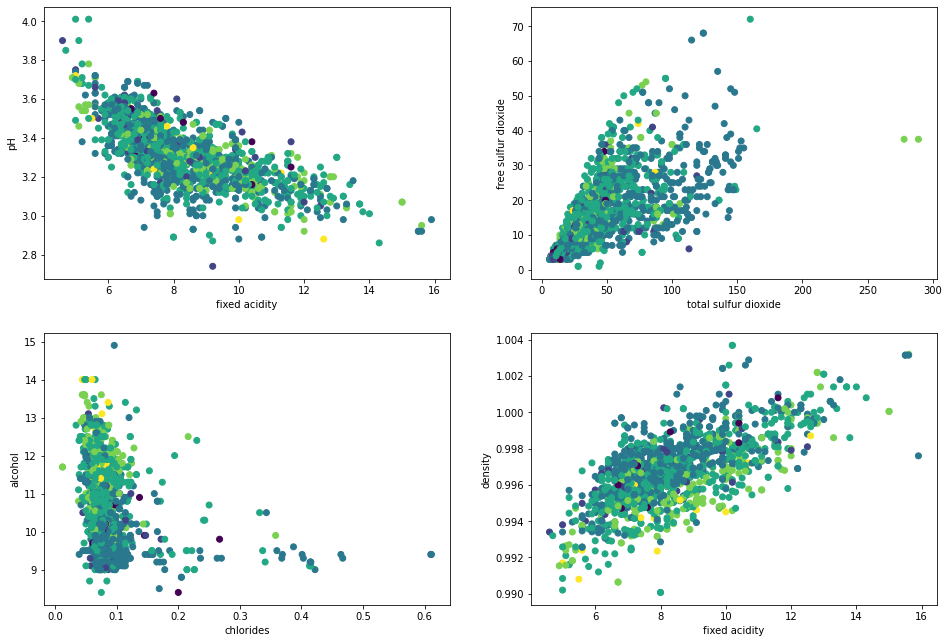

In [26]:
f, ax = plt.subplots(2, 2, figsize=(16, 11))

ax[0, 0].scatter(data2["fixed acidity"], data2["pH"], c=data2["quality"])
ax[0, 0].update({'xlabel': 'fixed acidity', 'ylabel': 'pH'})

ax[0, 1].scatter(data2["total sulfur dioxide"], data2["free sulfur dioxide"], c=data2["quality"])
ax[0, 1].update({'xlabel': 'total sulfur dioxide', 'ylabel': 'free sulfur dioxide'})

ax[1, 0].scatter(data2["chlorides"], data2["alcohol"], c=data2["quality"])
ax[1, 0].update({'xlabel': 'chlorides', 'ylabel': 'alcohol'})

ax[1, 1].scatter(data2["fixed acidity"], data2["density"], c=data2["quality"])
ax[1, 1].update({'xlabel': 'fixed acidity', 'ylabel': 'density'})

15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots. 
For every pair of variables, print the names of the variables, and the corresponding correlation. 
[1 mark]

In [27]:
from sklearn.feature_selection import r_regression
print(f"Pearson's correlation coefficient between fixed acidity and pH is {r_regression(data2, data2['pH'])[0]:.4f}")
print(f"Pearson's correlation coefficient between total sulfur dioxide and free sulphur dioxide is {r_regression(data2, data2['free sulfur dioxide'])[6]:.4f}")
print(f"Pearson's correlation coefficient between chlorides and alcohol is {r_regression(data2, data2['alcohol'])[4]:.4f}")
print(f"Pearson's correlation coefficient between fixed acidity and density is {r_regression(data2, data2['density'])[0]:.4f}")

Pearson's correlation coefficient between fixed acidity and pH is -0.6830
Pearson's correlation coefficient between total sulfur dioxide and free sulphur dioxide is 0.6677
Pearson's correlation coefficient between chlorides and alcohol is -0.2211
Pearson's correlation coefficient between fixed acidity and density is 0.6680


16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [28]:
X = data2[["fixed acidity", "alcohol", "density"]]
y = data2["quality"]

In [29]:
from sklearn.linear_model import LinearRegression

L = LinearRegression(fit_intercept=True, copy_X=True)
L.fit(X, y)
L.score(X, y)

0.2542806142979325

In [30]:
L.intercept_, L.coef_

(46.72844442970138, array([  0.10302486,   0.33119501, -45.54977943]))

17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the five R2 scores.

In [31]:
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits=K, shuffle=True)
r2s = []
X_split = kf.split(X)

In [32]:
for fold, (train_i, test_i) in enumerate(X_split):
    x_train = X.iloc[train_i]
    y_train = y.iloc[train_i]
    L.fit(x_train, y_train)
    r2s.append(L.score(X, y))

r2s = pd.DataFrame(r2s)
print(f"mean is {r2s.mean()[0]:.4f} to 4dp")
print(f"std is {r2s.std()[0]:.4f} to 4dp")

mean is 0.2541 to 4dp
std is 0.0002 to 4dp


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

In [33]:
# 18)
# using more columns would give more accurate score between quality and the rest of the features as a whole but would not
# necessarily be higher since any features with extreme (poor or excellent) R2 score with quality would skew the final
# calculated mean and std of the R2 score, more specifically a feature with poor R2 score with quality would reduce the mean
# R2 score so using more/ all the features doesn't necessarily increase R2 score

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

In [34]:
# 19)
# since the R2 scores are not that different and generally they of acceptable level, then other factors such as computational
# weight of the model should be taken into account
# for example R2=0.8 is more prefereable if the model required less features/ had lower space/ time complexity than R2=0.9 model
# since acceptable results can still be achieved with this model without wasting computational resources
# similar argument can be made for classifiers where lower accuracy can still be favourable if acceptable results are still
# produced on test data while saving time/ memory/ computational power etc.

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

In [35]:
data = pd.read_csv("dataset3.csv")
data.head()

,Tree_ID,Address,Town,Tree_Species,Species_Desc,Common_Name,Age_Desc,Height,Spread,Trunk,Actual_Trunk,Condition,Latitude,Longitude
0,27092,"Clonard Court, Balbriggan",Balbriggan,ACSA,Acer saccharinum,Silver Maple,Semi-Mature,5.1-10 metres,3 to 6 metres,11cm to 20cm,18cm,Good,53.606325,-6.186424
1,29144,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Fair - Poor,53.447465,-6.247613
2,29160,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,11cm to 20cm,11cm,Good,53.447695,-6.248258
3,29400,"Ridgewood Avenue, Forrest Great",Swords South,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,Up to 3 metres,1cm - 10cm,10cm,Good,53.445606,-6.246236
4,246560,"Lanesborough Grove, Saint Margaret's",Santry,TICO,Tilia cordata,Small-Leafed Lime,Young,Up to 5 metres,3 to 6 metres,11cm to 20cm,13cm,Fair to Good,53.404309,-6.291646


In [36]:
X = data[["Longitude", "Latitude"]]

In [37]:
from sklearn.cluster import KMeans
kms = []
for k in [5, 10, 15]:
    kmeans = KMeans(n_clusters=k)
    kms.append(kmeans)

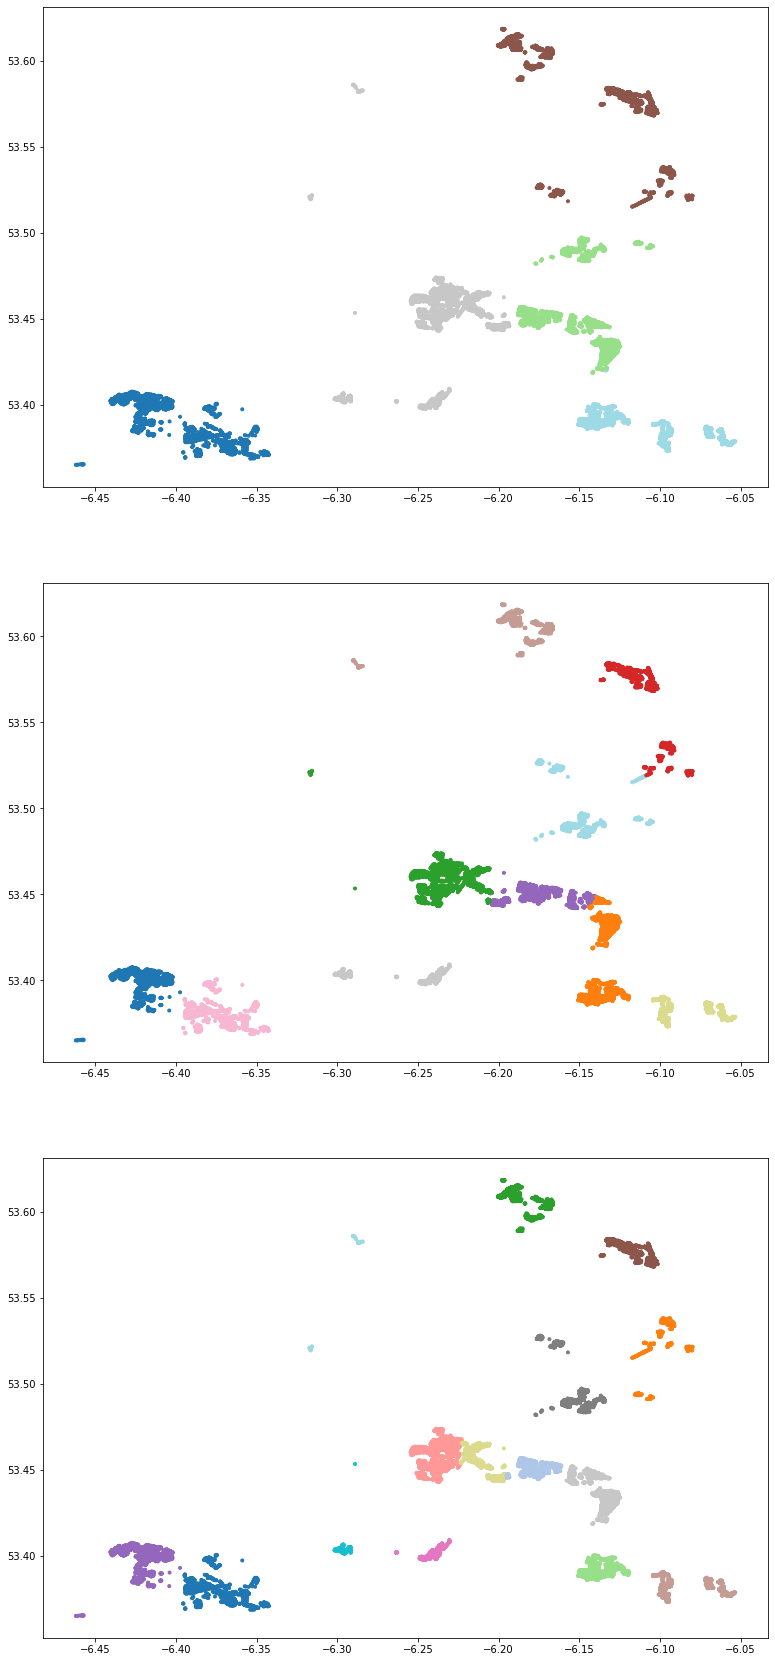

In [38]:
f, ax = plt.subplots(3, 1, figsize=(13, 30))
for i in range(len(kms)):
    ax[i].scatter(X["Longitude"], X["Latitude"], marker=".", c=kms[i].fit_predict(X), cmap="tab20")

21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster. 
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

In [39]:
from sklearn.cluster import DBSCAN
dbs = []
for e in [0.001, 0.005, 0.01, 0.05]:
    db = DBSCAN(eps=e)
    dbs.append(db)

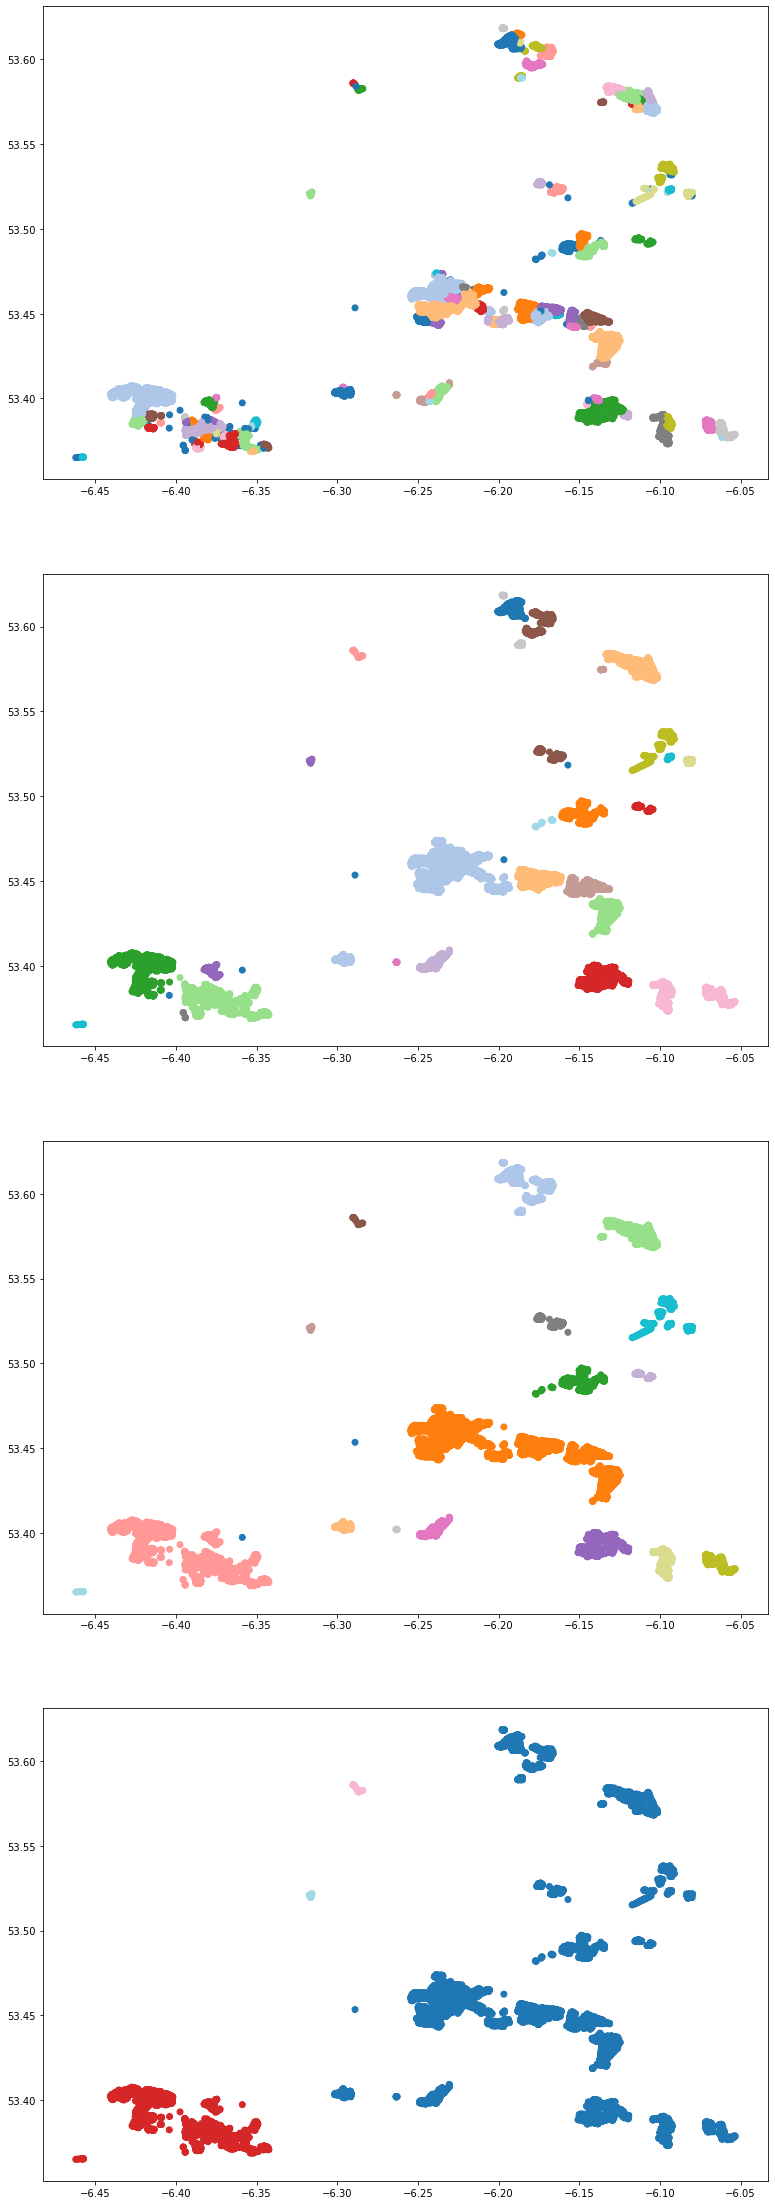

In [40]:
f, ax = plt.subplots(4, 1, figsize=(13, 40))
for i in range(len(dbs)):
    ax[i].scatter(X["Longitude"], X["Latitude"], c=dbs[i].fit_predict(X), cmap="tab20")

22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the 
best clustering, according to the Silhouette score? [2 marks]

In [41]:
from sklearn.metrics import silhouette_score

print("kmeans:")
k = [5, 10, 15]
for i in range(len(k)):
    labels = kms[i].fit_predict(X)
    print(k[i], end="-> ")
    print(silhouette_score(X, labels, metric="euclidean"))

print("dbscans:")
e = [0.001, 0.005, 0.01, 0.05]
for i in range(len(e)):
    labels = dbs[i].fit_predict(X)
    print(e[i], end="-> ")
    print(silhouette_score(X, labels, metric="euclidean"))


kmeans:
5-> 0.5960306493002994
10-> 0.6238164318112462
15-> 0.6629271311064681
dbscans:
0.001-> 0.24654779191419357
0.005-> 0.5407076619493659
0.01-> 0.393094609216632
0.05-> 0.43883380804344585


In [42]:
# best clustering using silhouette score is highest values (closest to +1) therefore best model for clustering this data
# was k=15 KMeans clustering model with this test

23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [43]:
from sklearn.metrics import davies_bouldin_score

print("kmeans:")
k = [5, 10, 15]
for i in range(len(k)):
    labels = kms[i].fit_predict(X)
    print(k[i], end="-> ")
    print(davies_bouldin_score(X, labels))

print("dbscans:")
e = [0.001, 0.005, 0.01, 0.05]
for i in range(len(e)):
    labels = dbs[i].fit_predict(X)
    print(e[i], end="-> ")
    print(davies_bouldin_score(X, labels))


kmeans:
5-> 0.5859005430339365
10-> 0.533436901246058
15-> 0.4612916520123397
dbscans:
0.001-> 1.3049809965029235
0.005-> 0.8701655709920809
0.01-> 0.5967046437447137
0.05-> 0.44518863489975385


In [44]:
# # best clustering using davies-bouldin score is lowest values (closest to 0) therefore best model for clustering this data
# was also shown to be k=15 KMeans clustering model with this test

24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
for n in range(3, 13, 3):
    agg_clust = AgglomerativeClustering(n_clusters=n, affinity="euclidean", linkage="ward")
    agg_clust.fit_predict(X)
    print(n, "->", silhouette_score(X, agg_clust.labels_, metric="euclidean"))
    print(n, "->", davies_bouldin_score(X, agg_clust.labels_))

3 -> 0.6037740179437524
3 -> 0.5839787599869948
6 -> 0.5986299593294552
6 -> 0.568467570955175
9 -> 0.5711524366457957
9 -> 0.5880785247191785
12 -> 0.6402209715654513
12 -> 0.4693283998950446


In [47]:
# with silhouette score, n=12 Agglomerative Clustering produces better results since 0.64 > 0.62
# with davies bouldin score, k=15 KMeans clustering remains as the most better clustering model for the data

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

In [48]:
# the smaller the eps parameter, the smaller the radius the model evaluates valid addition to the current cluster for the
# longer it takes becasue there are more calculations necessary and the algorithm requires more time to cover all the data points
# in the sample given since its looking for neighbours within given radius from every datapoint.
# whereas kmeans is given a fixed number of clusters (k) to optimize by randomly placing centroids and minimising distances to
# the surrounding datapoints meaning it is more efficient for larger datasets as this is much less calulations necessary.

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

In [49]:
# for data where clusters are of consistant density but irregular shapes, DBSCAN will perform better since it will traverse
# the data points for neighbours in a certain range, relying on density to determine valid clustering.
# on the other hand, clusters which are of regular (circular) shape but not necessarily evenly distributed/ density, KMeans will
# perform better since it will rely on calculating distances from centroid points and not distances between neighbouring datapoints.
# and KMeans is also preferred if certain number of clusters is known/ needed in the dataset compared to DBSCAN where the
# number of clusters cannot be determined/ decided by the user before running the model on the data.

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

In [50]:
# Model A seems to be limited after 100 datapoints as it no longer improves, adding data is not likely to have much effect
# and both graphs are likely to continue to extend horizontally ie. the model will continue to make the same number of errors
# when tested
# Model B shows continuous improvement in testing with increased training set size so addition to the training set may show
# more errors as it learns however a more significant improvement is likely to be seen in testing resulting in less errors

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

In [51]:
# Model A seems to have high bias, the model is likely to be simple leading to high error due to underfitting and therefore
# poor training results which is reflected in error-prone test outcomes, can be improved by increasing the model's complexity
# to allow for more degrees of freedom.
# Model B is likely to well defined model with appropriate number of degrees of freedom for the data, leading to effective
# training which reflects in comparatively error-free testing results, would be improved by increasing training set size allowing
# model to increase accuracy.
# Model C seems to have high variance as the graph shows strong training results but weak testing results indicating a complex
# model which is overfitting and causing many errors in testing, could be improved by choosing a simpler model or reducing
# degrees of freedom in the current model.

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

In [52]:
# overfitting is when a model fits the training data too well leading to high error rate in testing, usually due to high
# variance, when a model tends to have high sensitivity to small fluctuations in the training set.
# this is problematic because the model becomes too specific and is no longer able to generalise the pattern/ trend in the data
# so performs badly in testing/ real life.
# to avoid this, while working on the model regularly test the model so that poor test results (perhaps categorised by preset
# threshold) is caught before the model is made even more complex leading to certain overfitting

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states. 

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

In [53]:
# PCA is a very common method, it is computationally efficient and will produce a clear and meaningful dimensionally-reduced
# visualisation even for a complex high-D dataset however it assumes linearity and will therefore lose information when dealing
# non-linearly related features
# on the other hand, both t-SNE and UMAP will be able to handle these non-linear relationships, however UMAP will perform
# significantly better (with better space and time complexity) as well as producing a more robust visualisation which preserves
# local and global structures

31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

In [54]:
# since preproessing involves cleaning and manipulating the reduced dataset, PCA is high recommended since it is reliable
# both for visualising dimensionality reduction and then being able to work with the data in that state, compared to either
# t-SNE of UMAP which are not generally recommended beyond visualisation
# however, limitations of PCA will have to be considered, for example PCA is well-suited for linear relationships whereas complex
# data is likely to have non-linear relationships, in addition, non-numeric data will have to be pre-processed and numerically
# represented in order for PCA to work correctly, this is time and resource heavy and will likely need to be done manually which
# may not be ideal for such a large scale dataset despite PCA itself being well-suited for large-scale applications

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

In [55]:
# while the exact representations of the dataset in lower dimentions is not very reproducible using t-SNE or UMAP, the
# general analysis is since a similar visualisation and conclusions can be achieved
# however the stability of these conclusions is questionable since they can change dramatically depending on the hyperparameters
# used and any misinterpretation made by considering cluster size/ distance or general shape produced in the visualisation
# as these are effectively meaningless features of the visualisation when using t-SNE or UMAP
# similarly, use of PCA,as stated previously, will limit its effectiveness with complex dataset since non-linear relationships
# are to be expected, however keeping this in mind, meaningful visualisation and analysis both can still be achieved

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

In [56]:
# in a senario where one class signficantly outweighs the other ie. the dataset is unbalanced
# in this case the accuracy score may seem very high since the model is performing well for majority of the dataset since it
# is mostly made up of the dominant class, this hides poor performance of the other class and can lead to bias when the
# model is deployed and tested, for example identifying fruadulent transactions however this are rare in comparison to genuine
# banking transactions etc.
# this is because accuracy score is general measure for the model as a whole, to find under-represented classes and misleading
# conclusions you should calculate precision and recall score per class as this will show the model's performance more clearly,
# in the example of fraudulent transactions, accuracy would only show the proportion of all predictions that are correct,
# largely skewed by the dominant non-fraudulent activity, whereas recall of fraudulent class will clearly show how many of the
# fraudulent transactions specifically are correctly identified etc.
# simply doing f1 score per class is also sufficient as this is single metric specific to each class and combines the precision
# and recall so is also more informative than only doing accuracy score in this type of scenario.

34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

In [57]:
# precision is a measure of how many are correctly identified in all positive classifications, assuming there are mistakes
# ie. false positives
# recall is a measure of how many of the positive class are correctly identified as such, assuming there are mistakes ie.
# false negatives
# these two metrics are independent and would therefore require a perfect classifier in order to both be 100% because looking
# at the extreme, a classifier that consistently predicts a single class will have 100% recall but terrible precision and vice versa
# if positive classification is given sparingly (only when the model is super certain). in the general case, this means there
# has to be a trade-off between the two since achieving good precision leads to false negatives and achieving good recall leads to
# false positives, in other words unless a perfect classifier is build (highly unlikely) both precision and recall can't be 100%

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

In [58]:
# high recall and low precision is when all positive samples are well identified however there are many false positives,
# this may be desirable if patients are being tested for a disease and positive test result is needed for treatment, that way 
# almost every sick person is able to be treated but several healthy people may also be given the medicine etc.
# high precision and low recall is when positive classifications are correct however there are high numbers of false negatives,
# this is helpful if only the most certain samples should be identified for example if model is predicting best plant samples to 
# use in the next stage of artificial selection in order to genetically enhance a plant species for survival/ yield etc. in this
# case, the only the best of the best plants will be classified as usuable (positive) while many perfectly reasonable samples will be
# incorrectly identified as unusable (negative).

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

In [59]:
# a facial recognition model to detect expression of particular features etc. and trained on data collected in England, for example,
# may perform very well in Europe but will perform with horrible accuracy in China because of difference in features/ structure of
# caucasian vs oriental faces. While the model may be reliable within fixed training and testing within the context of predominantly
# white regions, it is not appropriate to use in real life or claiming that it works globally/ for everyone etc.
# this flaw should be recognised before release, either during preprocessing where imbalance of training dataset is recognised or
# during testing when realistic test data is used containing mix of individuals from all regions/ backgrounds (assuming the model
# was intended to be used on everyone by the creators) and poor performance can then be addressed.
# if the data used for training/ testing is limited and collection is difficult, the problem can be addressed by reducing the number
# samples of the dominant feature in the corpus (ie. removing some white people faces) or increasing the number of samples
# of the non-dominant feature (ie. augment the non-white individuals faces using mirroring to increase sample size) until there
# is roughly equal number of samples from each.

37. Give an example of a machine learning algorithm that might have low error in its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

In [60]:
# for example a model being used to classify past criminals as high/ low-risk later in life which is trained on details about
# each individual, their previous activies and their background may pick up on high correlation between crime and regional or racial
# information about the individuals to wrongly assume their risk. a specific example may be people living in a certain area are black
# and their correlation with high crime may be used by the algorithm to always classify them as high-risk later in life
# while this trend may be consistent in the dataset used and therefore show low error when testing, this is a fundamentally wrong
# assumption since in real life it could be down to that area having generally low income leading to more crime.
# so black individuals in other regions are wrongly classified as high-risk as well as non-black individuals in that area
# who genuinely are a concern may not be given high-risk status, in other words this error is not caught in the testing of the model
# but would be problematic when applied in real life.
# this can be addressed by methods of feature extraction, both to remove unnecessary features but also to determine whether the
# model's accuracy is highly dependent on certain features which can then be examined for bias in real-world application
# similarly, expanding original dataset with more variation between such features (ie. reducing correlation) could allow the model
# to be less reliant on them and this can assessed with regular evaluation/ human oversight as should be done with any system
# dealing with sensitive/ human variables with real-world implications.

_________________